## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [2]:
import pandas as pd

df = pd.read_csv('TaskTwoDataset.csv')
df


,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246
...,...,...,...,...,...,...,...,...,...
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4,8,63.926569,63.245473
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8,5,59.182641,60.012955
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7,1,57.746816,57.561438
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3,0,56.535277,55.463218


In [4]:
df.groupby('JamsDelay')[['JamsLength', 'TravelTimeLive']].agg(['min', 'max'])

JamsLength         TravelTimeLive            
                 min     max            min         max
JamsDelay                                              
0.0              0.0     0.0      49.745343   79.406348
0.4              0.2     1.7      55.189840   71.681310
0.5              0.1     2.0      51.246404   73.769531
0.6              0.1     1.7      49.180776   73.922070
0.7              0.2     2.1      51.183037   73.365980
...              ...     ...            ...         ...
5931.4         526.5   526.5      88.981859   88.981859
6125.2         527.5   527.5      87.608992   87.608992
8645.1         986.8   986.8     132.397426  132.397426
9400.3        1173.9  1173.9     120.189364  120.189364
9989.4        1171.1  1171.1     133.372646  133.372646

[12637 rows x 4 columns]

In [6]:
df.agg({'TravelTimeHistoric':'max',
            'TravelTimeLive':'max'})

TravelTimeHistoric    120.140593
TravelTimeLive        134.484139
dtype: float64

In [7]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


In [8]:
df.groupby(['JamsCount', 'JamsDelay'])['TravelTimeLive'].mean()

JamsCount  JamsDelay
0          0.0           57.512355
1          0.4           65.554791
           0.5           64.094099
           0.6           60.147715
           0.7           63.022639
                           ...    
938        5622.9       110.847281
941        5598.5       109.365358
1107       8645.1       132.397426
1292       9400.3       120.189364
1359       9989.4       133.372646
Name: TravelTimeLive, Length: 40343, dtype: float64

### Identify and analyze patterns in the data.

In [9]:
import numpy as np
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]


df_numeric.corr()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
TrafficIndexLive,1.000000,0.876216,0.861349,0.866799,0.903282,0.331072,0.642326
JamsCount,0.876216,1.000000,0.982459,0.952762,0.806545,0.305166,0.566874
JamsDelay,0.861349,0.982459,1.000000,0.962679,0.775028,0.303733,0.571188
JamsLength,0.866799,0.952762,0.962679,1.000000,0.787548,0.306312,0.569065
TrafficIndexWeekAgo,0.903282,0.806545,0.775028,0.787548,1.000000,0.327349,0.573365
TravelTimeHistoric,0.331072,0.305166,0.303733,0.306312,0.327349,1.000000,0.892562
TravelTimeLive,0.642326,0.566874,0.571188,0.569065,0.573365,0.892562,1.000000


Highest Correlations:

JamsCount and JamsDelay (0.98): This very high correlation suggests that as the number of traffic jams increases, the total delay caused by traffic jams also increases proportionally.
TravelTimeHistoric and TravelTimeLive (0.89): This high correlation indicates that historical travel times are a strong predictor of real-time travel times.

In [11]:
unique_values = df.select_dtypes(include=['object']).apply(lambda col: col.unique())
print(unique_values)

City        [Abudhabi, Al-ain, Cairo, Dammam, Doha, Dubai,...
Datetime    [2023-07-07 08:01:30, 2023-07-07 09:01:30, 202...
dtype: object


### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

/var/folders/3p/0bjvqt397999zpl674n8ls340000gn/T/ipykernel_12863/3146256347.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


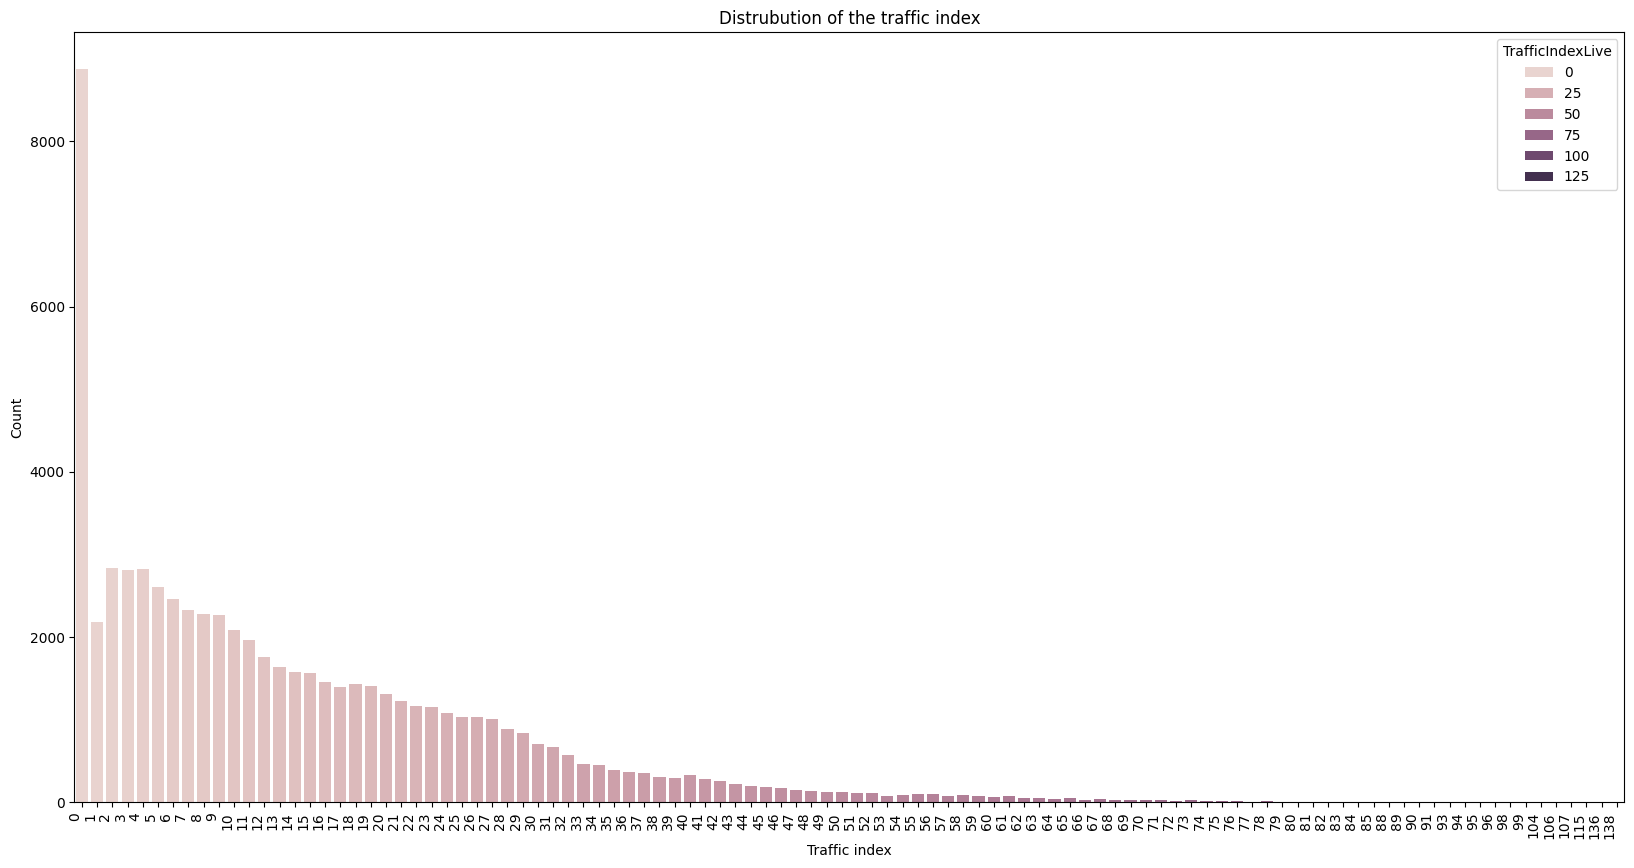

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.countplot(x='TrafficIndexLive', data=df, hue='TrafficIndexLive')
plt.title('Distrubution of the traffic index')
plt.xlabel('Traffic index')
plt.ylabel('Count')
ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.show()



/var/folders/3p/0bjvqt397999zpl674n8ls340000gn/T/ipykernel_12863/3575103004.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='JamsCount', data=hourly_jams, palette='viridis')


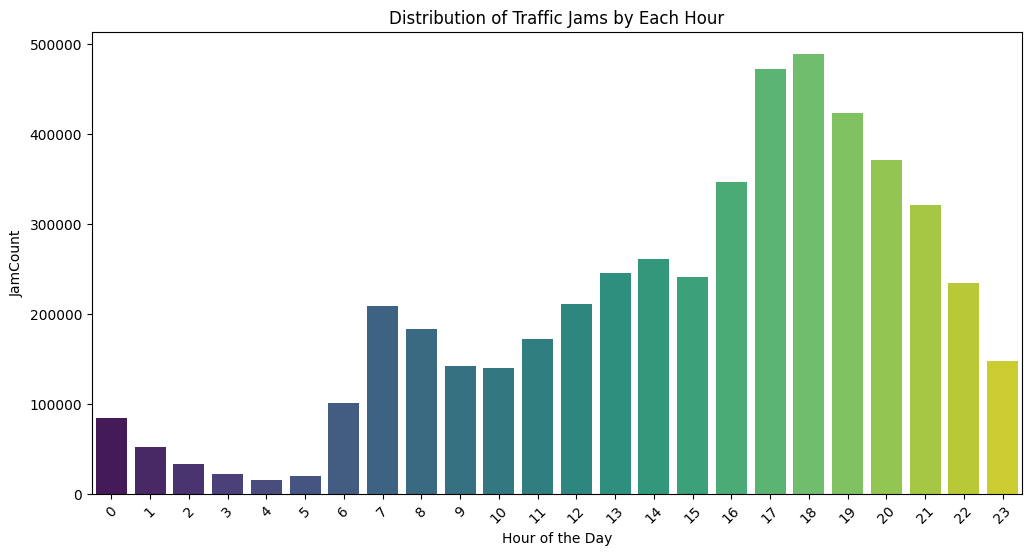

In [38]:
# Convert 'Datetime' column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract hour from Datetime
df['Hour'] = df['Datetime'].dt.hour

# Group by hour and calculate the sum of JamCount
hourly_jams = df.groupby('Hour')['JamsCount'].sum().reset_index()

# Plot the distribution of JamCount by each hour
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='JamsCount', data=hourly_jams, palette='viridis')
plt.title('Distribution of Traffic Jams by Each Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('JamCount')
plt.xticks(rotation=45)
plt.show()

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


In [24]:
df.groupby('TrafficIndexLive')['JamsDelay'].value_counts().unstack()


JamsDelay,0.0,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,...,5466.3,5510.0,5598.5,5622.9,5724.3,5931.4,6125.2,8645.1,9400.3,9989.4
TrafficIndexLive,,,,,,,,,,,,,,,,,,,,,
0,606.0,3.0,17.0,21.0,14.0,18.0,27.0,36.0,26.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,259.0,1.0,NaN,1.0,NaN,NaN,5.0,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,294.0,NaN,4.0,2.0,2.0,2.0,3.0,8.0,4.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,156.0,NaN,2.0,NaN,1.0,2.0,4.0,3.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,58.0,NaN,1.0,2.0,NaN,4.0,1.0,1.0,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

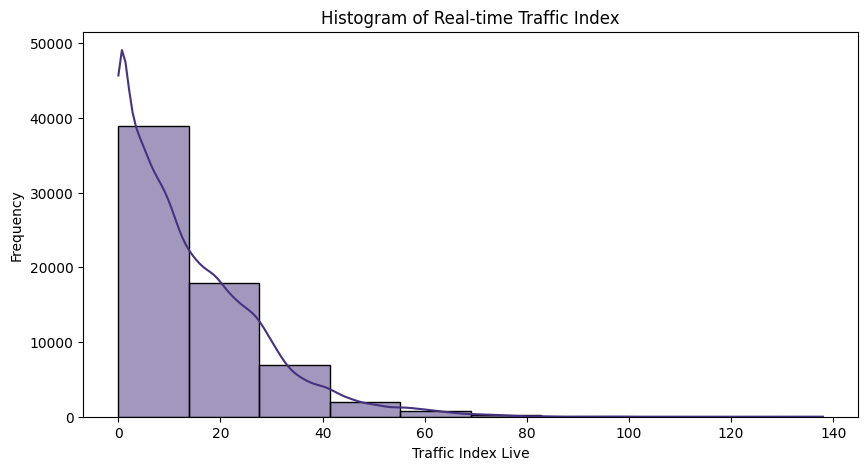

/var/folders/3p/0bjvqt397999zpl674n8ls340000gn/T/ipykernel_12863/4228514118.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='TrafficIndexLive', data=df, palette='viridis')


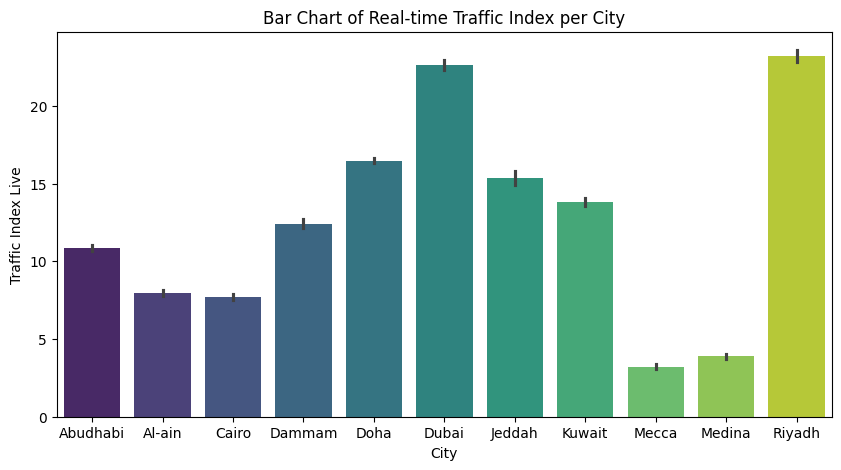

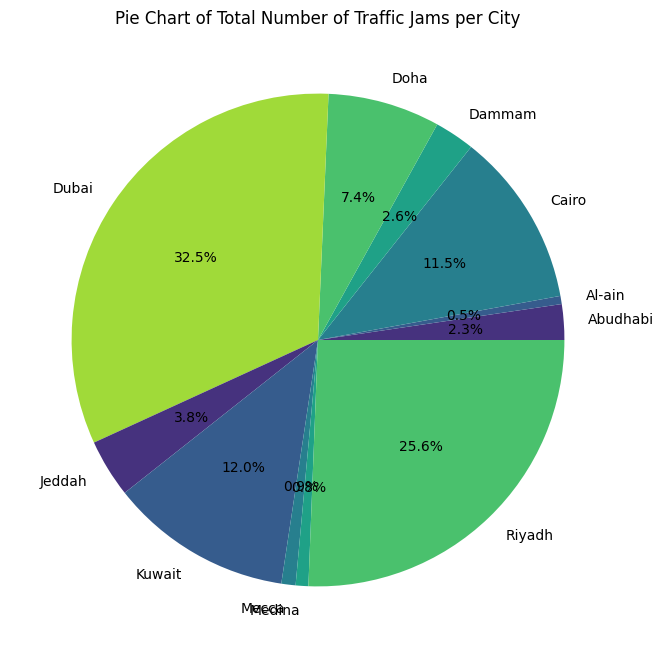

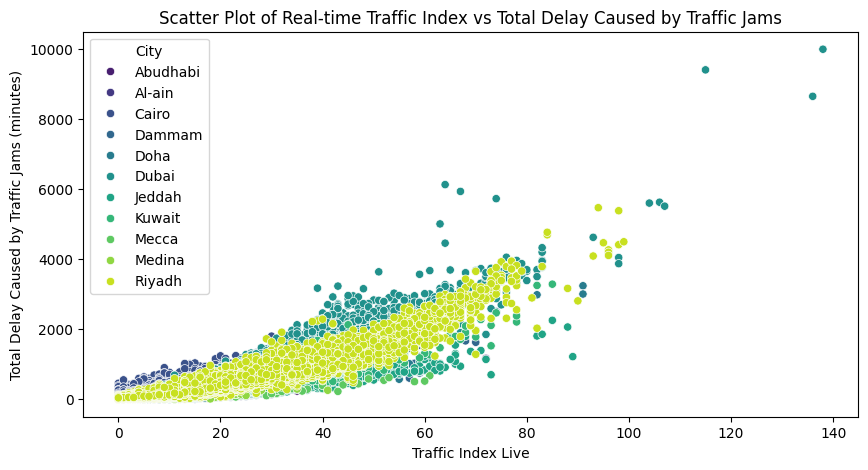

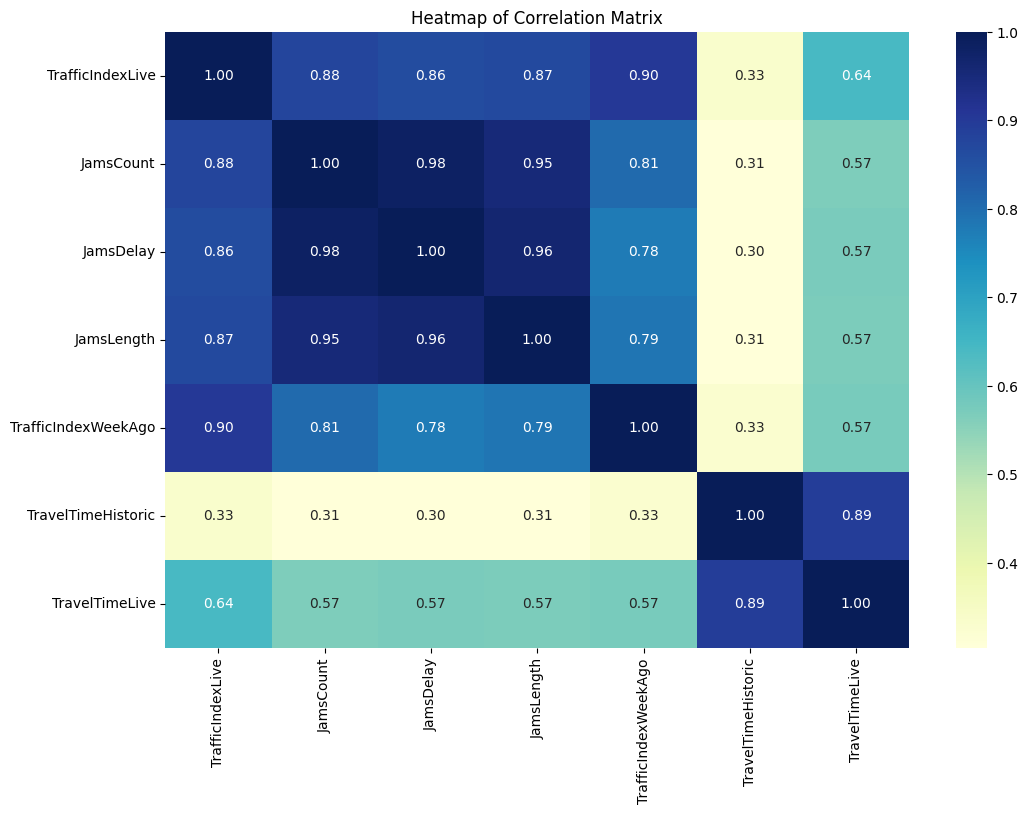

In [31]:
# Histogram 
plt.figure(figsize=(10, 5))
sns.histplot(df['TrafficIndexLive'], bins=10, kde=True)
plt.title('Histogram of Real-time Traffic Index')
plt.xlabel('Traffic Index Live')
plt.ylabel('Frequency')
plt.show()

# Bar 
plt.figure(figsize=(10, 5))
sns.barplot(x='City', y='TrafficIndexLive', data=df, palette='viridis')
plt.title('Bar Chart of Real-time Traffic Index per City')
plt.xlabel('City')
plt.ylabel('Traffic Index Live')
plt.show()

# Pie Chart 
plt.figure(figsize=(8, 8))
jams_count_per_city = df.groupby('City')['JamsCount'].sum()
sns.set_palette('viridis')
plt.pie(jams_count_per_city, labels=jams_count_per_city.index, autopct='%1.1f%%', colors=sns.color_palette())
plt.title('Pie Chart of Total Number of Traffic Jams per City')
plt.ylabel('')
plt.show()

# Scatter Plot 
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TrafficIndexLive', y='JamsDelay', hue='City', data=df, palette='viridis')
plt.title('Scatter Plot of Real-time Traffic Index vs Total Delay Caused by Traffic Jams')
plt.xlabel('Traffic Index Live')
plt.ylabel('Total Delay Caused by Traffic Jams (minutes)')
plt.show()



# Heatmap 
numeric_df = df.select_dtypes(include=[float, int])
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

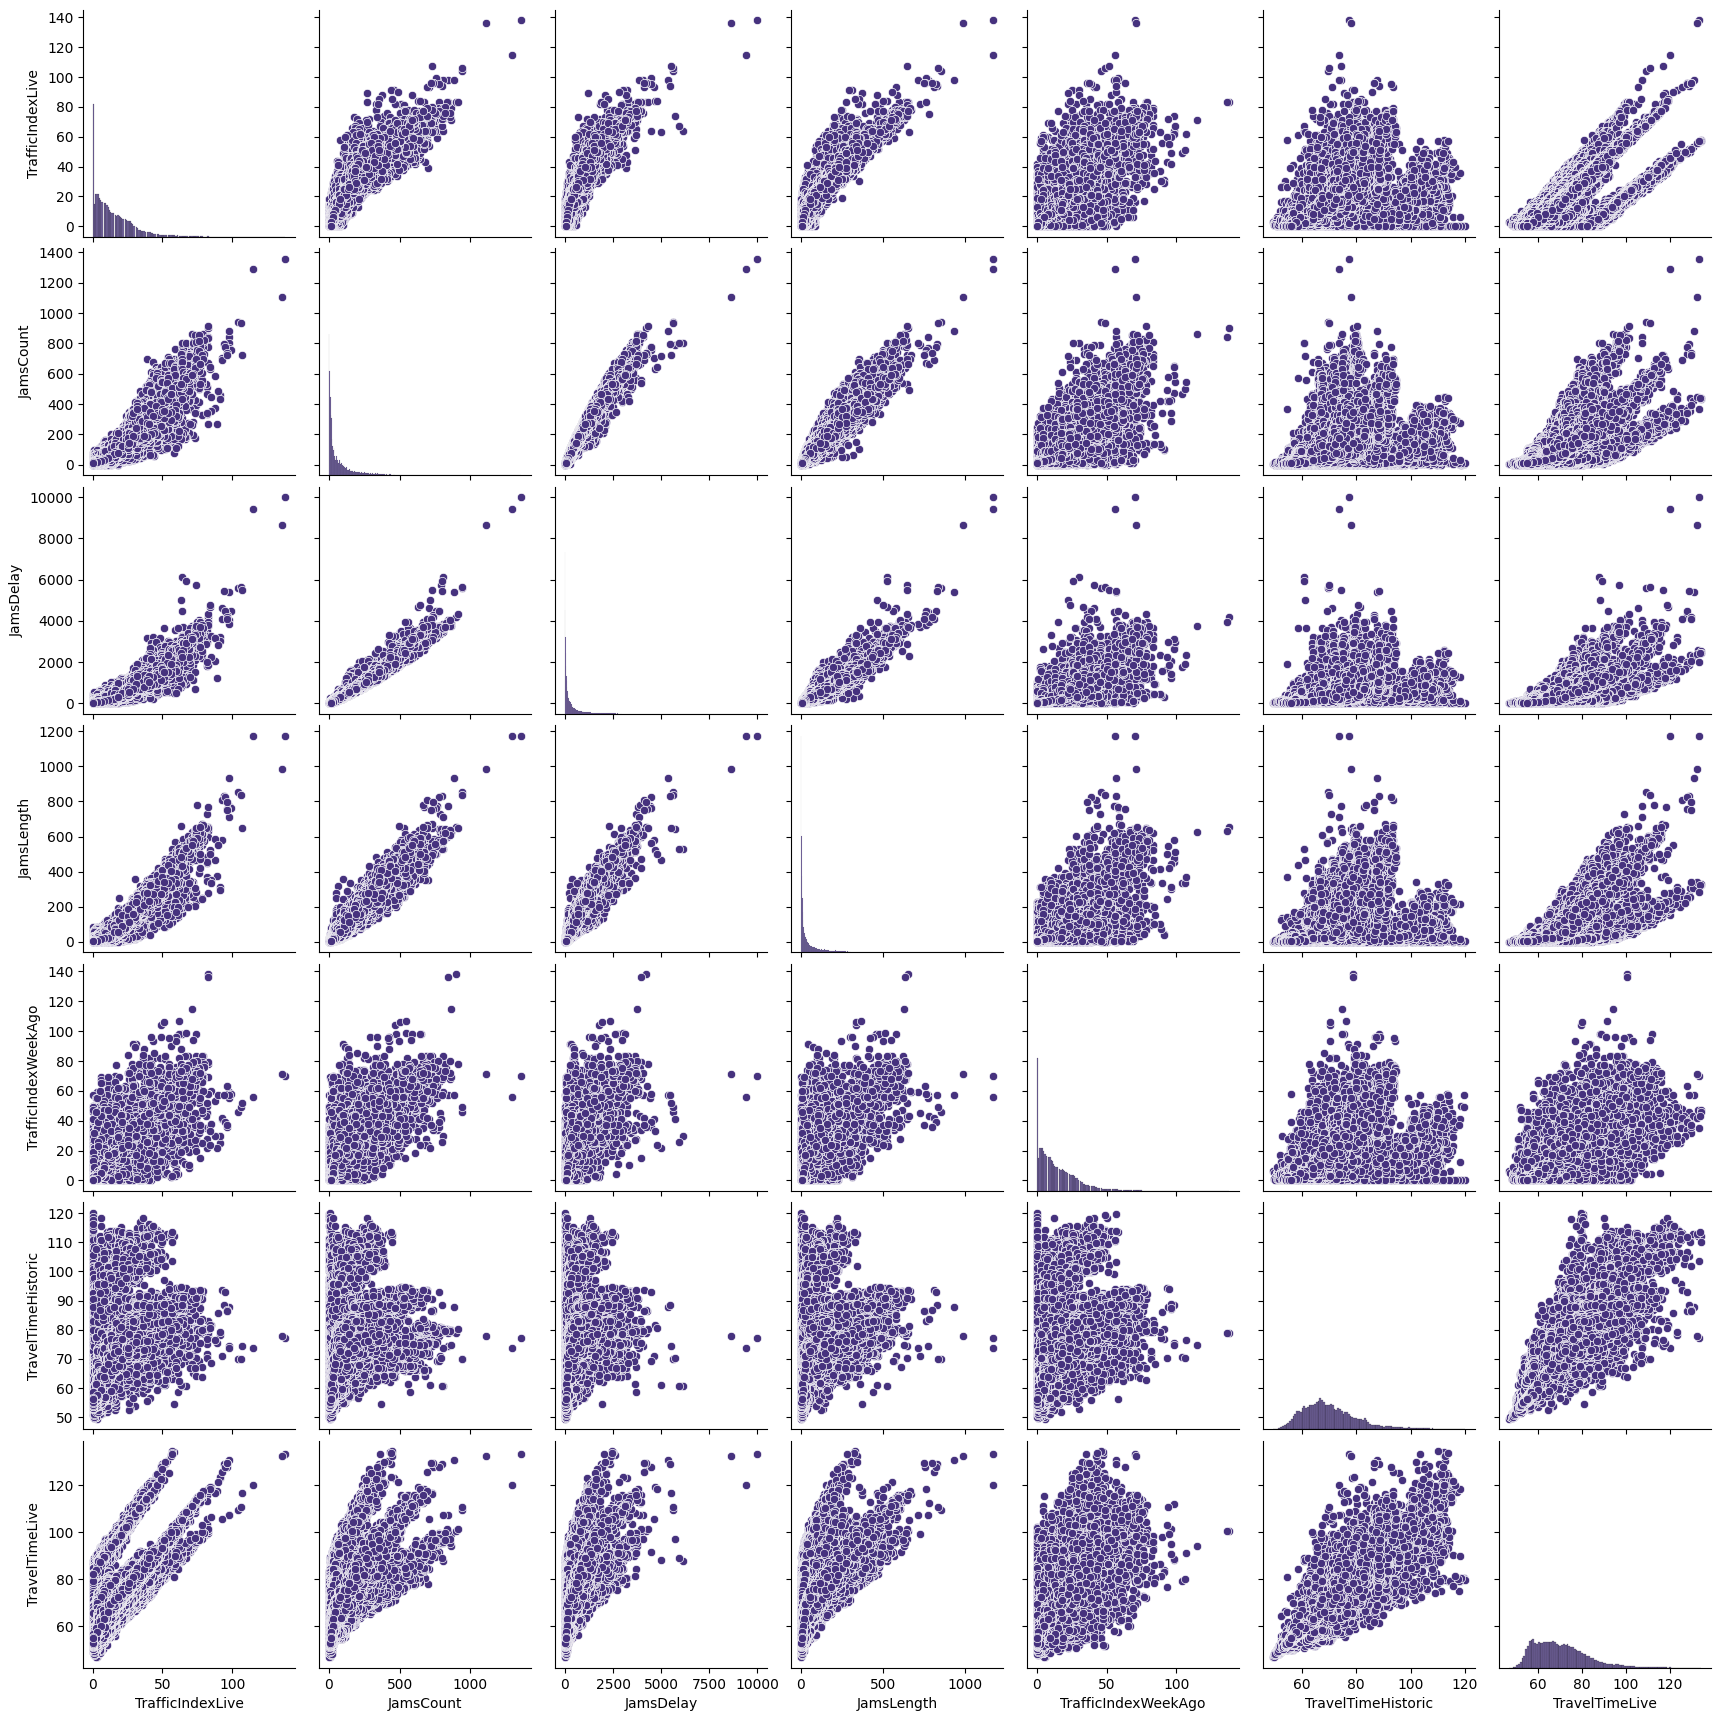

In [32]:
sns.pairplot(df);

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

Distribution of the Traffic Index
This bar chart shows how often different traffic index values occur, with most values being very low.

Distribution of Traffic Jams by Each Hour
This bar chart shows the total number of traffic jams for each hour of the day. It indicates that traffic jams are most frequent during the evening rush hour, peaking around 6 PM.

Histogram of Real-time Traffic Index
This histogram shows how frequently each real-time traffic index value appears, with a higher concentration of lower values.

Bar Chart of Real-time Traffic Index per City
This bar chart compares the real-time traffic index across various cities, highlighting which cities have higher or lower traffic indexes. 

Scatter Plot of Real-time Traffic Index vs. Total Delay Caused by Traffic Jams
This scatter plot shows the relationship between the real-time traffic index and the total delay caused by traffic jams, with each dot representing a different city.

Heatmap of Correlation Matrix
This heatmap shows how different traffic-related variables are related to each other, with darker colors indicating stronger relationships.